<h2><b>Họ và tên:</b> Phan Nguyễn Thành Nhân</h2>
<h2><b>MSSV:</b> 19521943</h2>
<h2><b>Lớp:</b> CS410.M11.KHCL</h2>

# Import necessary libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Check whether we are using ’GPU’ or ’CPU’

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In this notebook, I'll experiment with two datasets: Fashion-MNIST and CIFAR-10, using Multi Layer Perceptron and LeNet-5 models.

# Setup for getting the reproducible results

In [3]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Defining hyperarameters

In [4]:
learning_rate = 0.001 
batch_size = 64 
n_epochs = 50

# 1. Multi Layer Perceptron

## Loading data from Google Drive

### Fashion-MNIST

In [ ]:
train_dataset_FashionMNIST = datasets.FashionMNIST(root='/content/fashion_mnist', train = True, transform=transforms.ToTensor(), download=True)
train_loader_FashionMNIST = DataLoader(dataset=train_dataset_FashionMNIST, batch_size=batch_size, shuffle=True)

test_dataset_FashionMNIST = datasets.FashionMNIST(root='/content/fashion_mnist', train = False, transform=transforms.ToTensor(), download=True)
test_loader_FashionMNIST = DataLoader(dataset=test_dataset_FashionMNIST, batch_size=batch_size, shuffle=True)

In [6]:
input_size_FashionMNIST = 784
n_classes_FashionMNIST = 10

Ankle boot


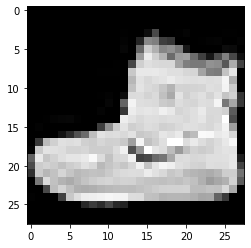

In [7]:
classes_FashionMNIST = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
image_FashionMNIST, label_FashionMNIST = train_dataset_FashionMNIST[0]
plt.imshow(image_FashionMNIST.squeeze(), cmap='gray')
print(classes_FashionMNIST[label_FashionMNIST])

### CIFAR-10

In [ ]:
train_dataset_CIFAR10 = datasets.CIFAR10(root='/content/CIFAR10', train = True, transform=transforms.ToTensor(), download=True)
train_loader_CIFAR10 = DataLoader(dataset=train_dataset_CIFAR10, batch_size=batch_size, shuffle=True)

test_dataset_CIFAR10 = datasets.CIFAR10(root='/content/CIFAR10', train = False, transform=transforms.ToTensor(), download=True)
test_loader_CIFAR10 = DataLoader(dataset=test_dataset_CIFAR10, batch_size=batch_size, shuffle=True)

In [9]:
input_size_CIFAR10 = 3072
n_classes_CIFAR10 = 10

frog	


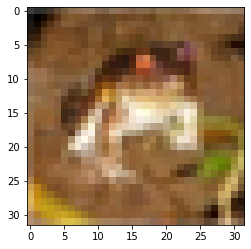

In [10]:
classes_CIFAR10 = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog	', 'horse', 'ship', 'truck')
image_CIFAR10, label_CIFAR10 = train_dataset_CIFAR10[0]
plt.imshow(image_CIFAR10.permute((1, 2, 0)))
print(classes_CIFAR10[label_CIFAR10])

## Building a Multi Layer Perceptron model using Pytorch

### For Fashion-MNIST dataset

In [11]:
class MLP_FashionMNIST(nn.Module):
    def __init__(self, input_size, n_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 100),
            nn.ReLU(),
            nn.Linear(100, 100),      
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 25), 
            nn.ReLU(),
            nn.Linear(25, n_classes),
            nn.Softmax(dim=1)
        )
    
    def forward(self, X):
        prob = self.model(X)
        return prob

In [12]:
model_FashionMNIST = MLP_FashionMNIST(input_size=input_size_FashionMNIST, n_classes=n_classes_FashionMNIST).to(device)
print(model_FashionMNIST)

MLP_FashionMNIST(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU()
    (6): Linear(in_features=50, out_features=25, bias=True)
    (7): ReLU()
    (8): Linear(in_features=25, out_features=10, bias=True)
    (9): Softmax(dim=1)
  )
)


### For CIFAR-10 dataset

In [13]:
class MLP_CIFAR10(nn.Module):
    def __init__(self, input_size, n_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),      
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 64), 
            nn.ReLU(),
            nn.Linear(64, n_classes),
            nn.Softmax(dim=1)
        )
    
    def forward(self, X):
        prob = self.model(X)
        return prob

In [14]:
model_CIFAR10 = MLP_CIFAR10(input_size=input_size_CIFAR10, n_classes=n_classes_CIFAR10).to(device)
print(model_CIFAR10)

MLP_CIFAR10(
  (model): Sequential(
    (0): Linear(in_features=3072, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=10, bias=True)
    (9): Softmax(dim=1)
  )
)


## Defining the loss and the optimization algorithm

In [15]:
criterion = nn.CrossEntropyLoss()
# Optmization algorithm for Fashion-MNIST dataset
optimizer_FashionMNIST = optim.Adam(model_FashionMNIST.parameters(), lr=learning_rate)
# # Optmization algorithm for CIFAR-10 dataset
optimizer_CIFAR10 = optim.Adam(model_CIFAR10.parameters(), lr=learning_rate)

## Training model

### Fashion-MNIST

In [ ]:
for epoch in range(n_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader_FashionMNIST):
        data = data.to(device)
        targets = targets.to(device)

        data = data.reshape(data.shape[0],-1)
        scores = model_FashionMNIST(data)

        loss = criterion(scores, targets)
        optimizer_FashionMNIST.zero_grad()
        loss.backward()

        optimizer_FashionMNIST.step()

        if (batch_idx+1) % 100 == 0:
            print(f"Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}")

### CIFAR-10

In [ ]:
for epoch in range(n_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader_CIFAR10):
        data = data.to(device)
        targets = targets.to(device)

        data = data.reshape(data.shape[0],-1)
        scores = model_CIFAR10(data)

        loss = criterion(scores, targets)
        optimizer_CIFAR10.zero_grad()
        loss.backward()

        optimizer_CIFAR10.step()

        if (batch_idx+1) % 100 == 0:
            print(f"Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}")

## Defining function get accuracy

In [18]:
def get_accuracy(loader, model):
    if loader.dataset.train:
        print("Getting accuracy on traning data.")
    else:
        print("Getting accuracy on testing data.")
    
    n_corrects = 0
    n_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)

            # forward
            scores = model(x)
            _, y_pred = scores.max(1)
            n_corrects += (y_pred == y).sum()
            n_samples += y_pred.size(0)
        
        print(f"We got {n_corrects}/{n_samples} correct. Accuracy = {n_corrects/float(n_samples)*100.0:.2f}")
    model.train()

## Performance Evaluation

### Fashion-MNIST

In [19]:
get_accuracy(train_loader_FashionMNIST, model_FashionMNIST)
get_accuracy(test_loader_FashionMNIST, model_FashionMNIST)

Getting accuracy on traning data.
We got 48987/60000 correct. Accuracy = 81.64
Getting accuracy on testing data.
We got 7977/10000 correct. Accuracy = 79.77


### CIFAR-10

In [20]:
get_accuracy(train_loader_CIFAR10, model_CIFAR10)
get_accuracy(test_loader_CIFAR10, model_CIFAR10)

Getting accuracy on traning data.
We got 21010/50000 correct. Accuracy = 42.02
Getting accuracy on testing data.
We got 4050/10000 correct. Accuracy = 40.50


# 2. LeNet-5

## Transformations

In [21]:
Transforms = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

## Loading data from Google Drive

### Fashion-MNIST

In [22]:
train_dataset_FashionMNIST = datasets.FashionMNIST(root='/content/fashion_mnist', train = True, transform=Transforms, download=True)
train_loader_FashionMNIST = DataLoader(dataset=train_dataset_FashionMNIST, batch_size=batch_size, shuffle=True)

test_dataset_FashionMNIST = datasets.FashionMNIST(root='/content/fashion_mnist', train = False, transform=Transforms, download=True)
test_loader_FashionMNIST = DataLoader(dataset=test_dataset_FashionMNIST, batch_size=batch_size, shuffle=True)

In [23]:
n_classes_FashionMNIST = 10

T-shirt/top


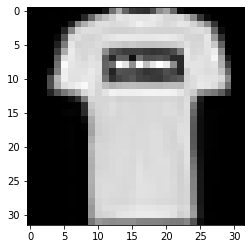

In [24]:
classes_FashionMNIST = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
image_FashionMNIST, label_FashionMNIST = train_dataset_FashionMNIST[1]
plt.imshow(image_FashionMNIST.squeeze(), cmap='gray')
print(classes_FashionMNIST[label_FashionMNIST])

### CIFAR-10

In [25]:
train_dataset_CIFAR10 = datasets.CIFAR10(root='/content/CIFAR10', train = True, transform=transforms.ToTensor(), download=True)
train_loader_CIFAR10 = DataLoader(dataset=train_dataset_CIFAR10, batch_size=batch_size, shuffle=True)

test_dataset_CIFAR10 = datasets.CIFAR10(root='/content/CIFAR10', train = False, transform=transforms.ToTensor(), download=True)
test_loader_CIFAR10 = DataLoader(dataset=test_dataset_CIFAR10, batch_size=batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [26]:
n_classes_CIFAR10 = 10

truck


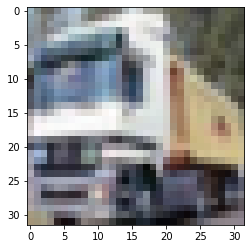

In [27]:
classes_CIFAR10 = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog	', 'horse', 'ship', 'truck')
image_CIFAR10, label_CIFAR10 = train_dataset_CIFAR10[1]
plt.imshow(image_CIFAR10.permute((1, 2, 0)))
print(classes_CIFAR10[label_CIFAR10])

## Build LeNet-5 by using PyTorch

### For Fashion-MNIST dataset

In [28]:
class LeNet5_FashionMNIST(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.Flatten(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=n_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, X):
        prob = self.model(X)
        return prob

In [29]:
model_FashionMNIST = LeNet5_FashionMNIST(n_classes=n_classes_FashionMNIST).to(device)
print(model_FashionMNIST)

LeNet5_FashionMNIST(
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


### For CIFAR-10 dataset

In [30]:
class LeNet5_CIFAR10(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.Flatten(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=n_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, X):
        prob = self.model(X)
        return prob

In [31]:
model_CIFAR10 = LeNet5_CIFAR10(n_classes=n_classes_CIFAR10).to(device)
print(model_CIFAR10)

LeNet5_CIFAR10(
  (model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


## Defining the loss and the optimization algorithm

In [32]:
criterion = nn.CrossEntropyLoss()
# Optmization algorithm for Fashion-MNIST dataset
optimizer_FashionMNIST = optim.Adam(model_FashionMNIST.parameters(), lr=learning_rate)
# # Optmization algorithm for CIFAR-10 dataset
optimizer_CIFAR10 = optim.Adam(model_CIFAR10.parameters(), lr=learning_rate)

## Training model

### Fashion-MNIST

In [ ]:
for epoch in range(n_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader_FashionMNIST):
        data = data.to(device)
        targets = targets.to(device)

        scores = model_FashionMNIST(data)

        loss = criterion(scores, targets)
        optimizer_FashionMNIST.zero_grad()
        loss.backward()

        optimizer_FashionMNIST.step()

        if (batch_idx+1) % 100 == 0:
            print(f"Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}")

### CIFAR-10

In [ ]:
for epoch in range(n_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader_CIFAR10):
        data = data.to(device)
        targets = targets.to(device)

        scores = model_CIFAR10(data)

        loss = criterion(scores, targets)
        optimizer_CIFAR10.zero_grad()
        loss.backward()

        optimizer_CIFAR10.step()

        if (batch_idx+1) % 100 == 0:
            print(f"Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}")

## Defining function get accuracy

In [35]:
def get_accuracy(loader, model):
    if loader.dataset.train:
        print("Getting accuracy on traning data.")
    else:
        print("Getting accuracy on testing data.")
    
    n_corrects = 0
    n_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)

            # forward
            scores = model(x)
            _, y_pred = scores.max(1)
            n_corrects += (y_pred == y).sum()
            n_samples += y_pred.size(0)
        
        print(f"We got {n_corrects}/{n_samples} correct. Accuracy = {n_corrects/float(n_samples)*100.0:.2f}")
    model.train()

## Performance Evaluation

### Fashion-MNIST

In [36]:
get_accuracy(train_loader_FashionMNIST, model_FashionMNIST)
get_accuracy(test_loader_FashionMNIST, model_FashionMNIST)

Getting accuracy on traning data.
We got 56196/60000 correct. Accuracy = 93.66
Getting accuracy on testing data.
We got 8859/10000 correct. Accuracy = 88.59


### CIFAR-10

In [37]:
get_accuracy(train_loader_CIFAR10, model_CIFAR10)
get_accuracy(test_loader_CIFAR10, model_CIFAR10)

Getting accuracy on traning data.
We got 36773/50000 correct. Accuracy = 73.55
Getting accuracy on testing data.
We got 5276/10000 correct. Accuracy = 52.76
